# ECE 5470 Lab 4 Report

### by  Cynthia Li

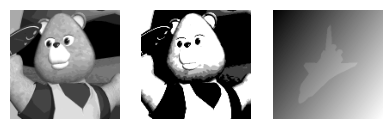

ted, windowed ted, and sshtl
<scaled size: (128 x 128) (128 x 128) (128 x 128) >


In [45]:
import numpy as np
from v4 import vx
from v4 import vd

import matplotlib.pyplot as plt

def window (im, win, level):
    """Window function for image im, returns a uint8 array""" 
    lo = level - win/2
    hi = lo + win
    mf = 255.0/win
    a = im.flatten()
    a [ a < lo] = lo
    a [ a > hi] = hi
    a = (a - lo ) * mf
    return a.reshape(im.shape).astype('uint8')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
def plot2d (tm):
    """ simple 2D plot function """
    xx, yy = np.mgrid[0:tm.shape[0], 0:tm.shape[1]]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca(projection='3d')
    ax.plot_surface(xx, yy, tm ,rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=1)
    plt.show()
    
vd.dispmvx("ted", window( vx.Vx('ted').i, 64, 128), "sshtl", size=0.6, 
           capt="ted, windowed ted, and sshtl")


## Section 2 Frequency Domain Filtering 
### 2.1 Image proerties: 
2.1.1 Quick questions:

1. Why two channels?

    Because in frequency domain, pixel value becomes complex numbers composed of real and imaginary parts. Therefore, we need two channels, one to store phase and one to store magnitude. This is useful as polar and rectangular form conversion is easy as well.

2. What are your window a level settings for  ted.mag:
    
    window = 6, level = 12

3. What are your window a level settings for  ted.phase:

    window = 8, level = 127

4. What are the mean, standard deviation, max, and min of ted.mag?

    1. mean = 12.8142
    2. standard deviation = 2.0895
    3. max = 255
    4. min = 0
    
5. What are the mean, standard deviation, max, min and min of ted.phase?

    1. mean = 127
    2. standard deviation = 2.7751
    3. max = 255
    4. min = 0

6. Explain the differences between the magnitude and phase statistics. 

    The max and minimum in the two images are the same (max as 255, low as 0). However, we see that the mean for phase is much higher (approximately 115) than the mag, which indicates that there should be a lot more low value pixels in mag than in phase. In the display, we see that this is true as the major part of mag is black(0) while the major part of phase is gray(127 according to simba)in the original image and thus requires higher level value for optimal windowing display. Also, both contains white dots and black dots at the center(even after windowing) which corresponds to the max, and the min. The standard deviation is so small because both of them only has variation at the center, so the difference between pixels is averaged out. 

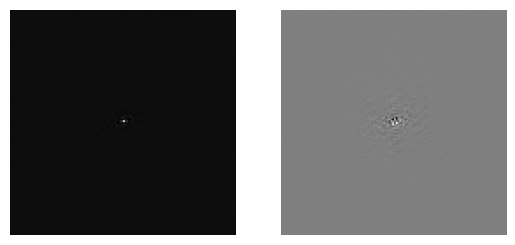

original ted.mag, ted.phase for comparision below
<scaled size: (128 x 128) (128 x 128) >


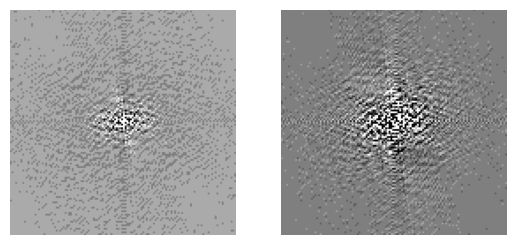

windowed ted.mag, windowed ted.phase


<scaled size: (128 x 128) (128 x 128) >


In [74]:
#show your windowed images here
vd.dispmvx('ted.mag', 'ted.phase', size = 0.8, capt='original ted.mag, ted.phase for comparision below')
vd.dispmvx(window( vx.Vx('ted.mag').i, 6, 12), window( vx.Vx('ted.phase').i, 8, 127), size = 0.8, capt="windowed ted.mag, windowed ted.phase\n\n")

### 2.1.2

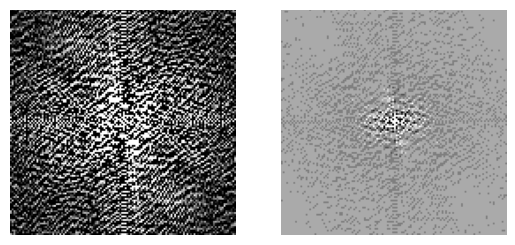

visualized ted.xlmag compared to the original
<scaled size: (128 x 128) (128 x 128) >


In [73]:
#display ted.xlmag here
vd.dispmvx(window(vx.Vx('ted.xlmag').i, 114, 29), window(vx.Vx('ted.mag').i, 6, 12), size = 0.8, capt="visualized ted.xlmag compared to the original")

6. how was the value selected for bf= 
    
    I chose 110.336 for the bf=, this is because I want to avoid big values at f=0 (so I need to remove the DC components). Therefore, using bf= equal to the mean of the original image would be a good solution.

7. Discuss (explain) the result and the method used to create it?

    In order to visualize the ted.mag image, we executed two command lines as instructed. In the first commnad line, we used vfix to convert the data type to float and used vpix to remove the DC component as mentioned in 6 and finally applied fast fourier transform to extract the magnitude of the image (the real value part) in frequency domain. The second command line would scale the magnitude and perform log function on the magnitude which allows us to see the changes in the magnitude more clearly in the resulted image compared to ted.mag.

From the new ted.xlmag, we have very different mean and standard deviation, specifically as below:
1. mean = 28.986
2. standard deviation = 38.134
3. max = 255
4. min = 0

This makes sense because after the operation in 2.1.2, the DC terms is removed, and the little difference between the original ted.mag is amplified by scaling and log performed by vexfft with -x and -l flag. Therefore, here in ted.xlmag, we observe a larger mean and standard deviation. This is observable as the new image shows more variance in color and more lighter pixels (higher pixel values) and become readable without the windowing. 

### 2.2 Frequency Filtering
1. what is generated by the vgenim command?

    vgenim would generate an image that has a size of 128*128 (128 pixels in length and width) and a circle at the center with radius 32 composed by pixel with value 1.
    
2. Why is vchan being used?

    vchan is used because the image that we created were only 1-channel images and we wanted to merge them as one 2-channel image fil. The function vchan allows us to manipulate multiple-channel images and thus can assist us with the merging simply and easily by specifying the if=(the input file), ig=(the merged file), and the of=(the output file).

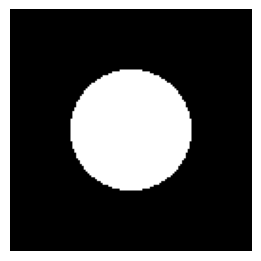

the f1 filter
<scaled size: (128 x 128) >


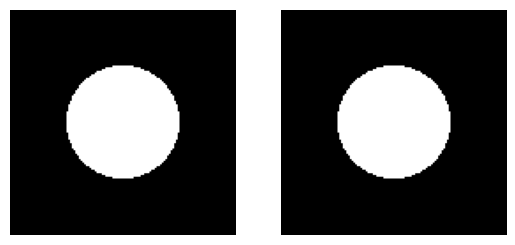

magnitude and phase of fil


<scaled size: (128 x 128) (128 x 128) >


In [97]:
vd.dispmvx('f1', size = 0.8, capt="the f1 filter")
vd.dispmvx('fil.mag', 'fil.phase', size = 0.8, capt="magnitude and phase of fil\n\n")

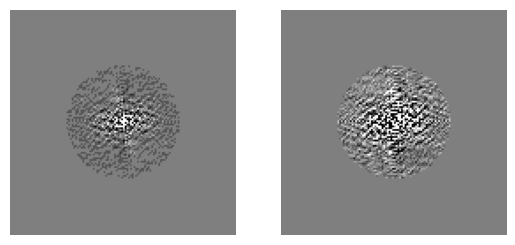

magnitude and phase of tedf.fft


<scaled size: (128 x 128) (128 x 128) >


In [71]:
# 2.2.1 results of tedf.fft
vd.dispmvx(window(vx.Vx('tedf.mag').i, 6, 13), window(vx.Vx('tedf.phase').i, 8, 127), size = 0.8, capt="magnitude and phase of tedf.fft\n\n")

In the filtered tedf.mag:
1. mean = 12.9539
2. standard deviation = 2.06366
3. max = 255
4. min = 0

In the filtered tedf.phase；
1. mean = 127
2. standard deviation=2.74822
3. max = 255
4. min = 0

From the resulting image, we can see that the f1 filter can remove the noise outside the circle defined by f1, this is obvious both in the magnitude and the phase images. This means that only the high frequency noise on the boundary is removed, indicating that this is a circular low pass filter. As a result, since only little noise on the boundary is removed, we see that the statistical difference of between the magnitude and phase images of the original and the filtered image are little. Only the mean and the standard deviation varied a bit.  

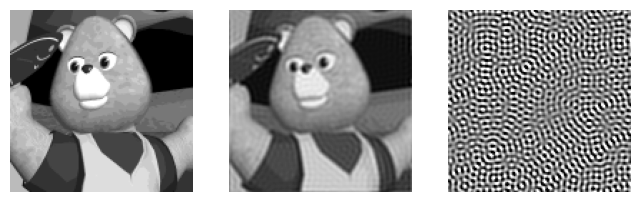

original image of ted compared to the magnitude and phase of ted.f (after inverse FFT)


<scaled size: (128 x 128) (128 x 128) (128 x 128) >


In [75]:
# 2.2.2 Results of inverse FFT of Ted
vd.dispmvx("ted", "ted_f.mag", window(vx.Vx('ted_f.phase').i, 96, 137), 
           capt="original image of ted compared to the magnitude and phase of ted.f (after inverse FFT)\n\n")

From the resulting image, we can see that the details of the inverse FFT image are blurred, and the edges are smoothed. These observations again proves that this is a low pass filter.

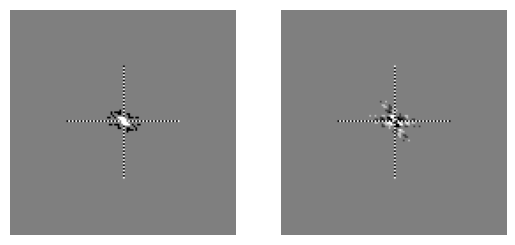

magnitude and phase of tedf.fft


<scaled size: (128 x 128) (128 x 128) >


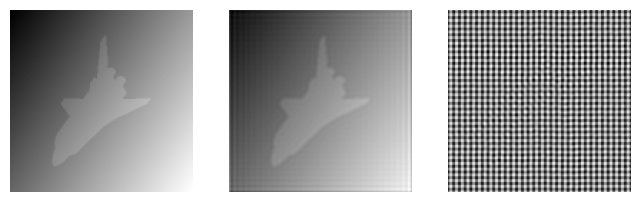

Original image of sshtl compared to the magnitude and phase of sshtl.f (after inverse FFT)


<scaled size: (128 x 128) (128 x 128) (128 x 128) >


In [80]:
# 2.2.2 Results of sshtlf.fft and inverse FFT of sshtl.f
vd.dispmvx(window(vx.Vx('sshtlf.mag').i, 2, 1), window(vx.Vx('sshtlf.phase').i, 4, 127), 
           size = 0.8, capt="magnitude and phase of tedf.fft\n\n")
vd.dispmvx("sshtl", "sshtl.mag", "sshtl.phase", 
           capt="Original image of sshtl compared to the magnitude and phase of sshtl.f (after inverse FFT)\n\n")

From the image, we can see that the edges is blurred and smoothed, the background has light grid pattern due to the phase. The above observations proves that this is a low pass filter.

## 3 Spatial Domain Filtering

### 3.1 Kernel Generation

1. What does the spatial filter look like?
   
   The sf1 filter is a 10 by 10 image with a 4 by 4 square filled with 1 (white). The sf2 filter is created by performing convolution on sf1 with itself. The resulting filter is an image with the center pixel = white, and decrease its values and gradually blends into surroundings. The sfil looks like the sf2 in 2D but should have a much smaller value, in 3D, it is a triangle shape. The specific image of sf1 and sf2 are shown below.

2. How was the tf= parameter selected?
    
    According to the VisionX API, the tf parameter is the value that every pixel need to multiply with. 
    Here, tf= is selected as 1/(10^10*2.56). This is selected to provide correct weight for the weighted average filter.

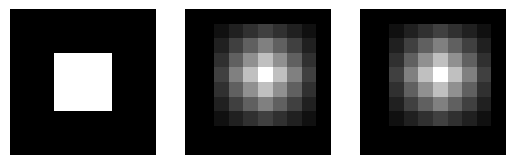

the sf1, sf2, sfil filter


<scaled size: (10 x 10) (10 x 10) (10 x 10) >


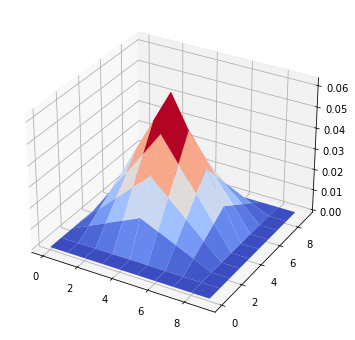

sfil filter shape in 3D


In [87]:
# Present Kernel Here
vd.dispmvx('sf1', 'sf2', 'sfil', size = 0.8, capt="the sf1, sf2, sfil filter\n\n")
plot2d(vx.Vx('sfil').i)
print("sfil filter shape in 3D")

### 3.2 Image convolution

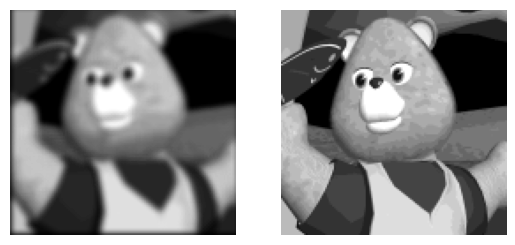

ted.sf compared to the original ted


<scaled size: (128 x 128) (128 x 128) >


In [91]:
vd.dispmvx('ted.sf', 'ted', size = 0.8, capt="ted.sf compared to the original ted\n\n")

We can see that this is also a low pass filter as the edges are smoothed and the details on the hand, ears, eyes, nose (such as highlights) of the teddy bear are blurred. As a result, some parts are enhanced (such as the dark gray shirt) due to the blurring as well.

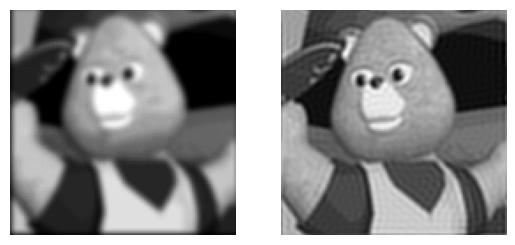

ted.sf compared to ted.f


<scaled size: (128 x 128) (128 x 128) >


In [92]:
vd.dispmvx('ted.sf', 'ted_f.mag', size = 0.8, capt="ted.sf compared to ted.f\n\n")

We can see that convolution filter provides a stronger smoothing effect on the edges and blurring details. Closely observe the images, we can still see noise on ted.f, especially on the face, whereas in the convolution filter, there is little noise. From the plot of the two filter in the 3D dimension, we can see why. In 3.1, we've seen that the convolution filter is a triangular filter so it cut off the high frequency noises. However, fil, the circle filter in 2D, has a spike in the middle and ripples around it in 3D as shown below. This means that it is does not has a cutoff frequency to remove the high frequency noise, it rather just make it smaller. Therefore, ted.sf doesn't have high frequency noise while ted.f still preserves the noise.

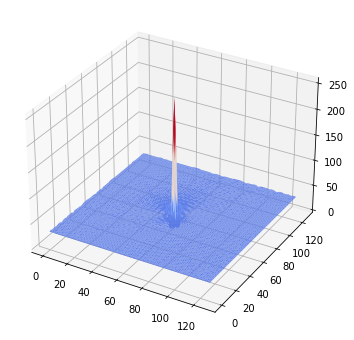

fil filter (From 2.2) in 2D


In [106]:
plot2d(vx.Vx('filf.mag').i)
print("fil filter (From 2.2) in 2D")

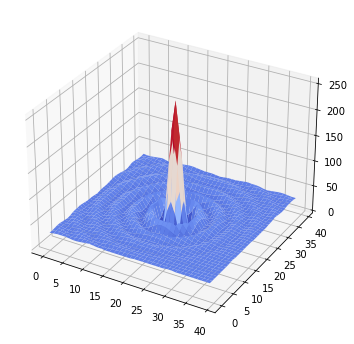

In [107]:
exec(vx.vxsh('vclip xl=45 xh=85 yl=45 yh=85 filf.mag of=fil_clip.mag'))
plot2d(vx.Vx('fil_clip.mag').i)

From a closer look at fil, we see that it looks like a spike in the middle and have ripples with gradually decreasing magnitude around it. Also, we can see that the ripples always have a positive magnitude, which makes it pretty much looks like the sinc function of the sum of square x and square y.